# THE SPARKS FOUNDATION : GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP), FEBRUARY 2024

# Domain - Computer Vision and Internet of Things

## PROBLEM STATEMENT

## INTERNSHIP TASK 3: Traffic Sign Classification/Recognition System

Data Source - https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Implement a real-time traffic sign classifier that identifies the traffic sign and gives an alert

## SOLUTION

## AUTHOR : ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


#### IMPORTING LIBRARIES

In [2]:
!pip install keras_tuner

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pickle
import seaborn as sns
import keras_tuner
import keras
import tensorflow as tf
import gc
import PIL

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.utils import load_img

from keras_tuner import RandomSearch
from keras_tuner.engine import hyperparameters

2024-02-06 15:13:16.603659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 15:13:16.603761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 15:13:16.720103: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### IMPORTING THE DATASETS

In [4]:
train_img_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
train_imgs = []
train_labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(train_img_path, str(i))
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        train_imgs.append(im)
        train_labels.append(i)
train_imgs = np.array(train_imgs)
train_labels = np.array(train_labels)

In [5]:
test_img_path = "/kaggle/input/gtsrb-german-traffic-sign"
test_data = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

test_labels = test_data["ClassId"].values
test_images_data = test_data["Path"].values

test_imgs = list()
for img in test_images_data:
    image = load_img(os.path.join(test_img_path, img), target_size=(30, 30))
    test_imgs.append(np.array(image))

test_imgs=np.array(test_imgs)
test_labels = np.array(test_labels)

#### EXPLORATORY ANALYSIS OF THE DATA

In [6]:
print(train_imgs.shape)
print(train_labels.shape)  

(39209, 30, 30, 3)
(39209,)


In [7]:
print(test_imgs.shape)
print(test_labels.shape) 

(12630, 30, 30, 3)
(12630,)


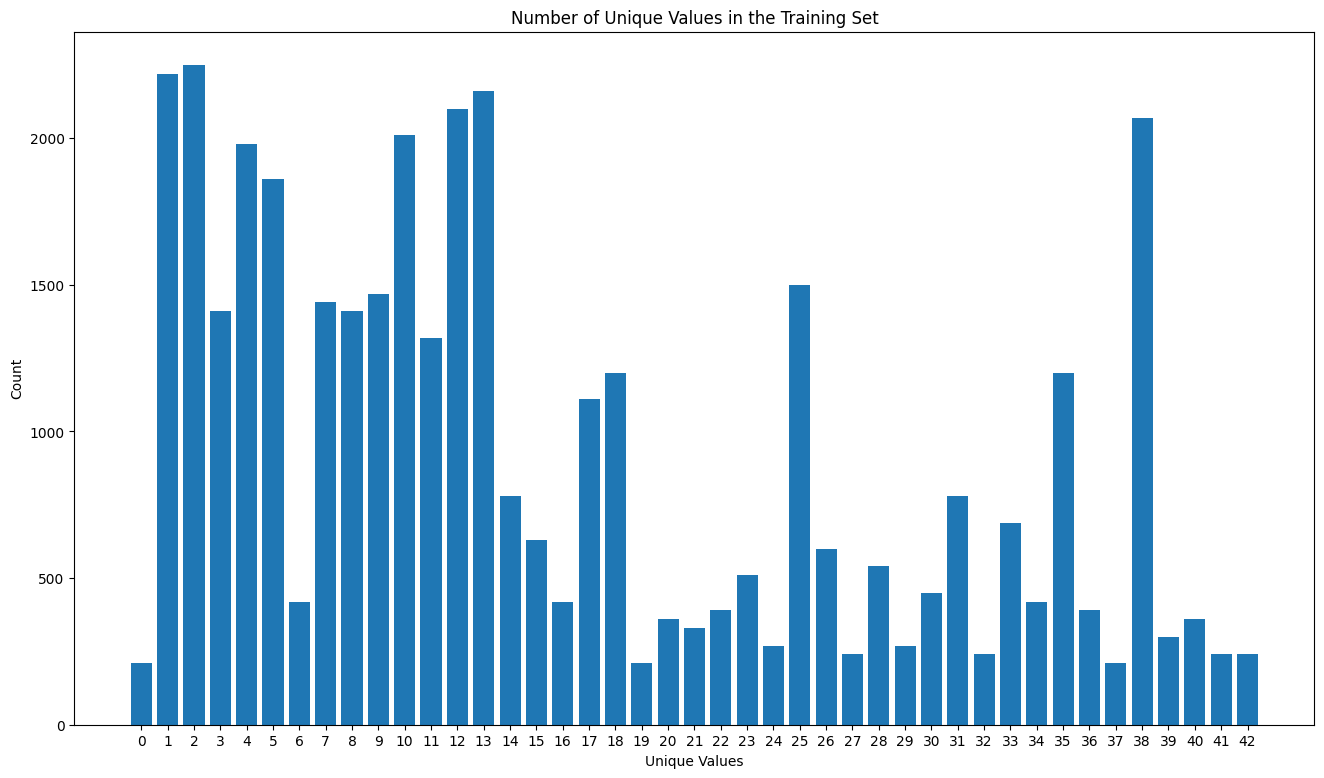

In [8]:
unique_values, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize = (16,9))
plt.bar(unique_values, counts)
plt.xticks(np.arange(min(unique_values), max(unique_values) + 1, 1.0))
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Number of Unique Values in the Training Set")
plt.show()

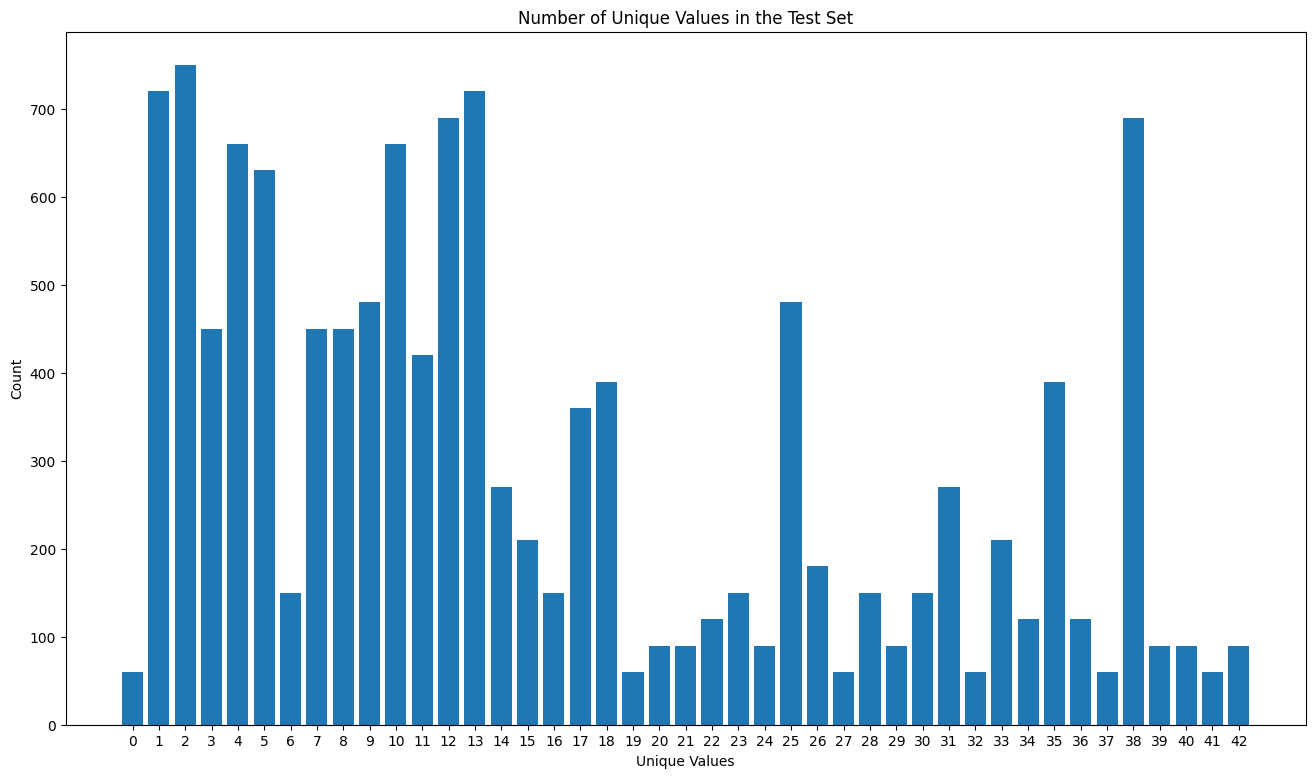

In [9]:
unique_values, counts = np.unique(test_labels, return_counts=True)
plt.figure(figsize = (16,9))
plt.bar(unique_values, counts)
plt.xticks(np.arange(min(unique_values), max(unique_values) + 1, 1.0))
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Number of Unique Values in the Test Set")
plt.show()

In [10]:
def show_train_img(int):
    cap = train_labels[int]
    image = train_imgs[int]
    plt.figure(figsize = (4,4))
    plt.imshow(image)
    plt.xlabel(str(cap))
    plt.show
    
def show_test_img(int):
    cap = test_labels[int]
    image = test_imgs[int]
    plt.figure(figsize = (4,4))
    plt.imshow(image)
    plt.xlabel(str(cap))
    plt.show

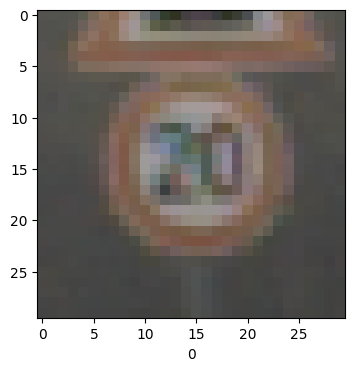

In [11]:
show_train_img(23)

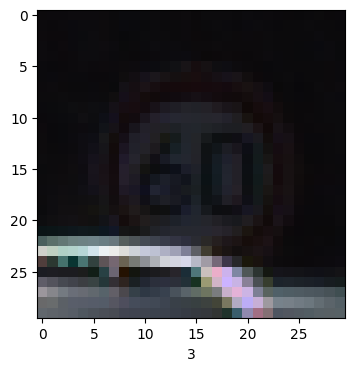

In [12]:
show_test_img(23)

#### DATA SCALING AND SHUFFLING

In [13]:
train_imgs = train_imgs * (1./255)
test_imgs = test_imgs * (1./255)
gc.collect()

21712

In [14]:
x_train = train_imgs
y_train = train_labels 

x_test = test_imgs
y_test = test_labels

In [15]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

#### FINDING THE BEST FIT MODEL

In [16]:
def build_model(hp):
    
    model = keras.models.Sequential()

    model.add(tf.keras.layers.Flatten(input_shape=(30,30,3)))

    model.add(keras.layers.Dense(units=hp.Int('dense_1_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_1_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_1_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_2_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_2_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_2_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_2_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_3_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_3_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_3_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dropout(rate=hp.Float('dropout_3_rate',min_value=0.1,max_value=0.9,step=0.05)))

    model.add(keras.layers.Dense(units=hp.Int('dense_4_units',min_value=8,max_value=1024,step=8),activation=hp.Choice('dense_4_activation',values=['relu', 'elu', 'selu']),kernel_initializer=hp.Choice('dense_4_kernel_initializer',values=['random_normal','glorot_normal', 'he_normal', 'glorot_uniform'])))

    model.add(keras.layers.Dense(43,activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
                                          loss='sparse_categorical_crossentropy',
                                          metrics=['accuracy'])

    return model

In [17]:
tuner_search = RandomSearch(build_model,objective='val_accuracy', max_trials = 500, directory='output', project_name="traffic_sign_recognition")
tuner_search.search(x_train, y_train,epochs = 5, batch_size = 128, validation_split=0.15)

Trial 500 Complete [00h 00m 11s]
val_accuracy: 0.038252294063568115

Best val_accuracy So Far: 0.9255355596542358
Total elapsed time: 01h 31m 10s


In [18]:
model = tuner_search.get_best_models(num_models=1)[0]
parameters=tuner_search.get_best_hyperparameters(1)[0]
print(parameters.values)

{'dense_1_units': 160, 'dense_1_activation': 'selu', 'dense_1_kernel_initializer': 'he_normal', 'dropout_1_rate': 0.5, 'dense_2_units': 632, 'dense_2_activation': 'elu', 'dense_2_kernel_initializer': 'glorot_uniform', 'dropout_2_rate': 0.35, 'dense_3_units': 664, 'dense_3_activation': 'elu', 'dense_3_kernel_initializer': 'glorot_normal', 'dropout_3_rate': 0.25, 'dense_4_units': 1008, 'dense_4_activation': 'relu', 'dense_4_kernel_initializer': 'he_normal', 'learning_rate': 0.001}


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7f45424c3c70>>


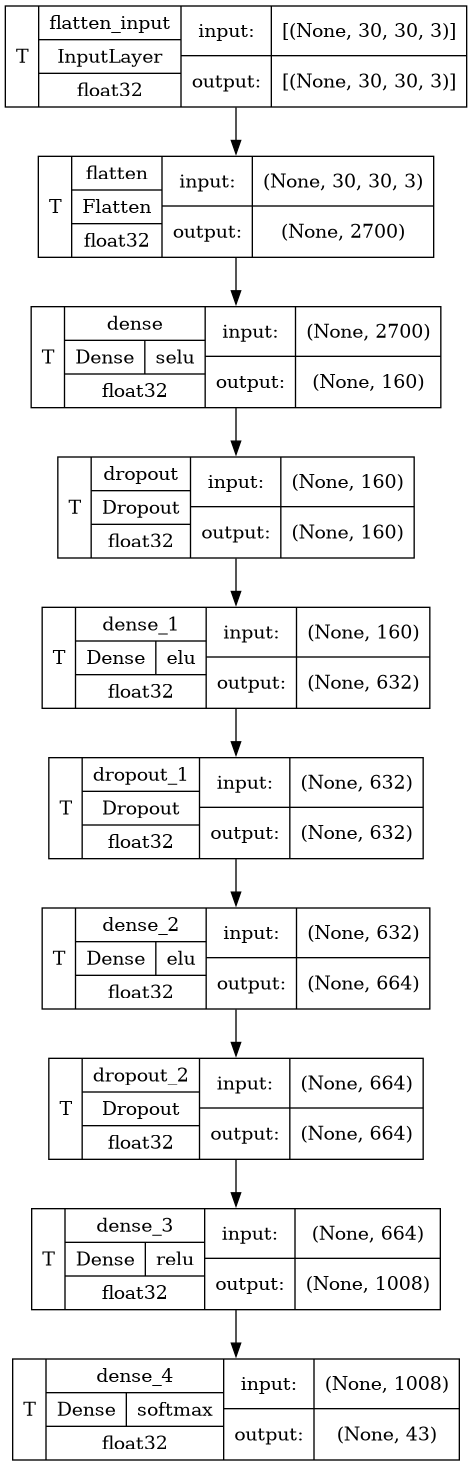

In [19]:
print(model.summary)
model_name='/kaggle/working/traffic_sign_classifier.png'
keras.utils.plot_model(model, to_file=model_name, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, dpi=96, show_layer_activations=True, show_trainable=True, rankdir='TB')

In [20]:
traffic_sign_classifier = model

In [21]:
traffic_sign_classifier.fit(x_train, y_train, epochs = 200, batch_size = 128, validation_split = 0.2)

Epoch 1/200
246/246 [==============================] - 3s 6ms/step - loss: 0.5349 - accuracy: 0.8304 - val_loss: 0.6386 - val_accuracy: 0.8152
Epoch 2/200
246/246 [==============================] - 1s 4ms/step - loss: 0.5377 - accuracy: 0.8290 - val_loss: 0.3743 - val_accuracy: 0.8768
Epoch 3/200
246/246 [==============================] - 1s 4ms/step - loss: 0.4590 - accuracy: 0.8530 - val_loss: 0.2867 - val_accuracy: 0.9063
Epoch 4/200
246/246 [==============================] - 1s 4ms/step - loss: 0.4432 - accuracy: 0.8571 - val_loss: 0.2863 - val_accuracy: 0.9087
Epoch 5/200
246/246 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8681 - val_loss: 0.2056 - val_accuracy: 0.9388
Epoch 6/200
246/246 [==============================] - 1s 4ms/step - loss: 0.4397 - accuracy: 0.8596 - val_loss: 0.2409 - val_accuracy: 0.9280
Epoch 7/200
246/246 [==============================] - 1s 5ms/step - loss: 0.4399 - accuracy: 0.8615 - val_loss: 0.2026 - val_accuracy: 0.9416

#### EVALUATION OF THE CLASSIFIER

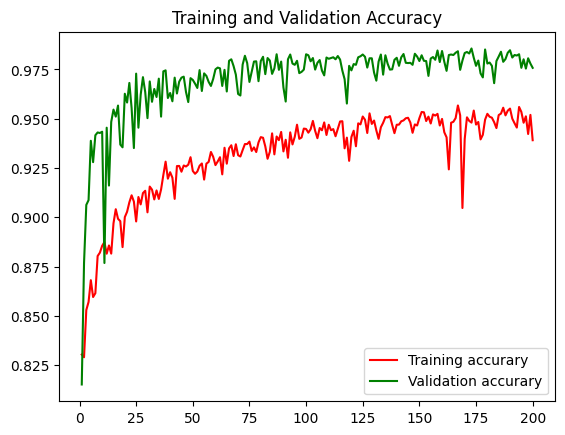

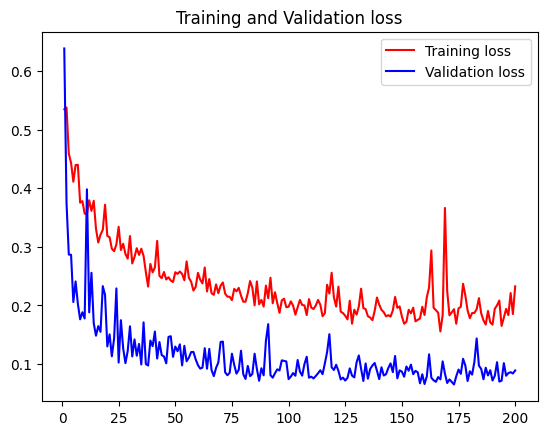

In [22]:
acc=traffic_sign_classifier.history.history['accuracy']
val_acc=traffic_sign_classifier.history.history['val_accuracy']
loss=traffic_sign_classifier.history.history['loss']
val_loss=traffic_sign_classifier.history.history['val_loss']
epochs=range(1,len(acc)+1)


plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [23]:
y_probability=traffic_sign_classifier.predict(x_test)
y_predict = np.argmax(y_probability,axis=1)

395/395 [==============================] - 1s 2ms/step


The classification test results are : 

              precision    recall  f1-score   support

           0       0.94      0.48      0.64        60
           1       0.77      0.91      0.84       720
           2       0.85      0.89      0.87       750
           3       0.87      0.62      0.72       450
           4       0.85      0.86      0.86       660
           5       0.70      0.83      0.76       630
           6       0.99      0.71      0.82       150
           7       0.84      0.83      0.84       450
           8       0.86      0.90      0.88       450
           9       0.95      0.91      0.93       480
          10       0.96      0.94      0.95       660
          11       0.86      0.94      0.90       420
          12       0.99      0.98      0.98       690
          13       0.99      0.98      0.98       720
          14       0.97      0.98      0.97       270
          15       0.95      0.86      0.90       210
          16       0.97      0.97      0.

<Axes: >

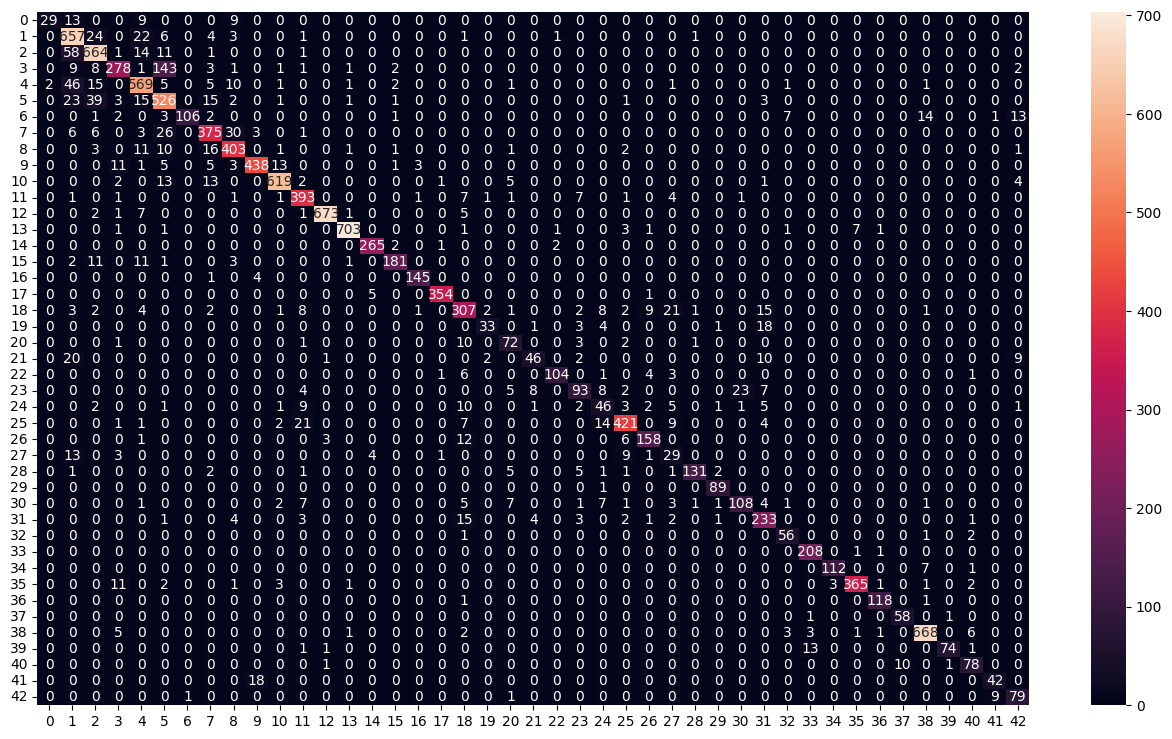

In [24]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predict))
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predict))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predict,average='micro'))*100)
print('\n')
print('The test ROC AUC percentage is :')
print(roc_auc_score(y_test,y_probability,multi_class = 'ovr'))

print('Confusion Matrix :')
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize = (16,9))
sns.heatmap(cm, annot = True, fmt = 'g')

#### SAVING THE MODEL

In [25]:
traffic_sign_classifier.save("/kaggle/working/traffic_sign_classifier.h5")